In [3]:
%matplotlib inline
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from sklearn import linear_model

In [4]:
G = nx.DiGraph()
nodes = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']
links = [('A','C'),('B','C'),('C','D'),('D','E'),('D','F'),('F','G'),('F','H')]
G.add_nodes_from(nodes)
G.add_edges_from(links)

In [5]:
# node name
names = {
'A':'A',
'B':'B',
'C':'C',
'D':'D',
'E':'E',
'F':'F',
'G':'G',
'H':'H'
}
# link name
linknames = {
('A','C'):1,
('B','C'):2,
('C','D'):3,
('D','E'):4,
('D','F'):5,
('F','G'):6,
('F','H'):7
}
# source-receiver (origin-destination) list
od_list = [('A','E'), ('B','E'), ('A','G'), ('A','H')]

{('A', 'C'): Text(0.25873457793393423, -0.09757387744422283, '1'),
 ('B', 'C'): Text(0.11230805159617965, 0.013576581474911573, '2'),
 ('C', 'D'): Text(0.19245059301176073, -0.009446488323658846, '3'),
 ('D', 'E'): Text(0.24928294767048986, -0.34354928458551354, '4'),
 ('D', 'F'): Text(-0.13322459535624823, 0.12108503256938916, '5'),
 ('F', 'G'): Text(-0.6644272224578975, 0.19772470873473602, '6'),
 ('F', 'H'): Text(0.04092238870950762, 0.4543304789099907, '7')}

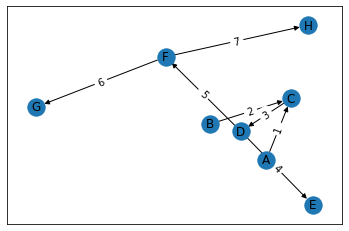

In [6]:
pos = nx.spring_layout(G, k=0.8)
nx.draw_networkx(G, pos, labels=names)
nx.draw_networkx_edge_labels(G, pos, edge_labels=linknames)

In [7]:
# 1000パケット送信したときのパケット通過数 (the number of packets passed when 1000 packets are transmitted)
od_success = {
    ('A', 'E'): 898,
    ('B', 'E'): 898,
    ('A', 'G'): 897,
    ('A', 'H'): 897
}

In [8]:
# ベクトル\hat{y}をy_e2eとして作成 (generate vector \hat{y} as y_e2e)
y = np.zeros(len(od_list)) # 初期化 (initialization)
for i in range(len(od_list)):
    print(od_list[i], od_success[od_list[i]])
    y[i] = od_success[od_list[i]]
y_e2e = -np.log(y/1000)

('A', 'E') 898
('B', 'E') 898
('A', 'G') 897
('A', 'H') 897


In [9]:
y

array([898., 898., 897., 897.])

In [10]:
y_e2e

array([0.10758521, 0.10758521, 0.10869942, 0.10869942])

In [11]:
A = np.zeros((len(od_list), len(links))) # 初期化 (initialization)
for i in range(len(od_list)):
    print(od_list[i])
    path = nx.shortest_path(G, od_list[i][0], od_list[i][1])
    print(path)
    for j in range(len(path)-1):
        k = links.index((path[j], path[j+1]))
        A[i,k] = 1

('A', 'E')
['A', 'C', 'D', 'E']
('B', 'E')
['B', 'C', 'D', 'E']
('A', 'G')
['A', 'C', 'D', 'F', 'G']
('A', 'H')
['A', 'C', 'D', 'F', 'H']


In [12]:
A

array([[1., 0., 1., 1., 0., 0., 0.],
       [0., 1., 1., 1., 0., 0., 0.],
       [1., 0., 1., 0., 1., 1., 0.],
       [1., 0., 1., 0., 1., 0., 1.]])

In [13]:
# 関数csを定義 (define function cs)
def cs(X, Y, alpha, positive):
    clf = linear_model.Lasso(alpha=alpha, fit_intercept=False, normalize=False, positive=positive)
    clf.fit(X,Y)
    return clf.coef_

[0.         0.         0.10716575 0.         0.         0.
 0.        ]
[0.         0.         0.10659212 0.         0.         0.
 0.        ]
[0.         0.         0.10568153 0.         0.         0.
 0.        ]
[0.         0.         0.10423606 0.         0.         0.
 0.        ]
[0.         0.         0.10194153 0.         0.         0.
 0.        ]
[0.         0.         0.09829918 0.         0.         0.
 0.        ]
[0.         0.         0.09251731 0.         0.         0.
 0.        ]
[0.         0.         0.08333917 0.         0.         0.
 0.        ]
[0.         0.         0.06876978 0.         0.         0.
 0.        ]
[0.         0.         0.04564231 0.         0.         0.
 0.        ]


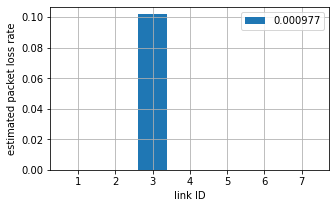

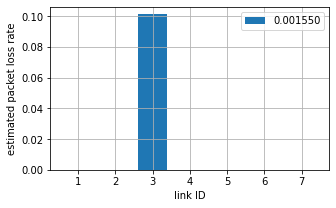

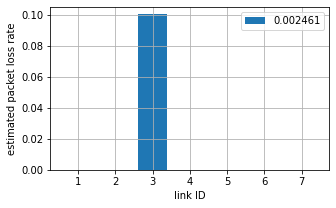

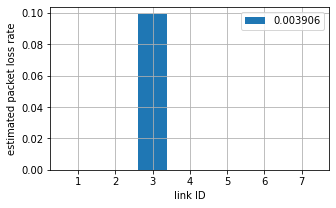

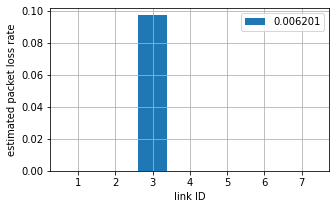

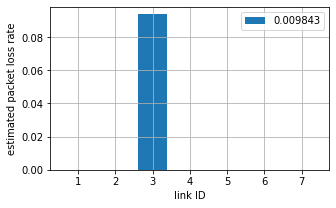

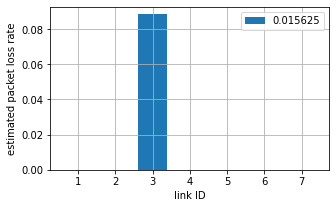

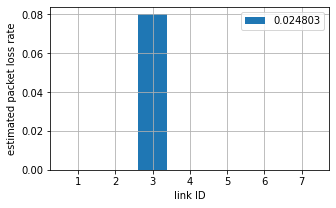

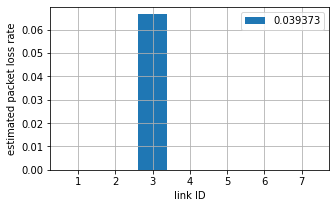

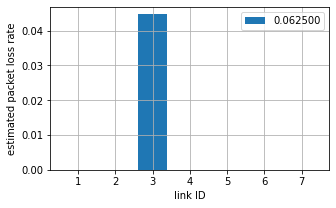

In [24]:
# csのXにAを,Yにy_e2eを代入して\hat{x}を計算.estが\hat{x} (Calculate \hat{x} by substituting A for X and y_e2e for Y in cs. est is \hat{x})
# alphaを変えて実験 (Experiment by changing alpha)
for ALPHA in np.logspace(-10, -4, 10, base=2):
    est = cs(A, y_e2e, alpha=ALPHA, positive=True)
    print(est)
    plt.figure(figsize=(5,3))
    plt.grid()
    plt.bar(range(1, len(est)+1), 1 - np.exp(-est), label='%f' %ALPHA )
    plt.legend()
    plt.xlabel('link ID')
    plt.ylabel('estimated packet loss rate')

In [21]:
p_loss = {}
for k in linknames:
    p_loss[k] = 0.001 #全てのリンクのロス率を0.001に設定 (Set the loss rate of all links to 0.001)
key_select = ('C', 'D')
print(links.index(key_select), key_select)
p_loss[key_select] = 0.1 #リンク(A,C)のロス率を0.1に設定 (Set the loss rate of link (A,C) to 0.1)
print(p_loss)

2 ('C', 'D')
{('A', 'C'): 0.001, ('B', 'C'): 0.001, ('C', 'D'): 0.1, ('D', 'E'): 0.001, ('D', 'F'): 0.001, ('F', 'G'): 0.001, ('F', 'H'): 0.001}


In [22]:
p_loss

{('A', 'C'): 0.001,
 ('B', 'C'): 0.001,
 ('C', 'D'): 0.1,
 ('D', 'E'): 0.001,
 ('D', 'F'): 0.001,
 ('F', 'G'): 0.001,
 ('F', 'H'): 0.001}

In [23]:
# 各ODペア(source-receiverペア)のパケット通過数を初期値1000に設定
# Set the number of packets passed for each OD pair (source-receiver pair) to initial value 1000
od_success = {}
for k in od_list:
    od_success[k] = 1000
print("OD success_before=", od_success)
# リンクロス率を用いてパケット通過数を計算 (Calculate the number of packets passed using the link loss rate)
for x,y in od_list:
    path = nx.shortest_path(G, x, y)
    print("x, y, path=", x, y, path)
    for i in range(len(path)-1):
        od_success[(x, y)] *= 1 - p_loss[(path[i], path[i+1])]
print("OD success_after", od_success)
# 結果のプリント (print the results)
for k, v in od_success.items():
    print(k, v)

OD success_before= {('A', 'E'): 1000, ('B', 'E'): 1000, ('A', 'G'): 1000, ('A', 'H'): 1000}
x, y, path= A E ['A', 'C', 'D', 'E']
x, y, path= B E ['B', 'C', 'D', 'E']
x, y, path= A G ['A', 'C', 'D', 'F', 'G']
x, y, path= A H ['A', 'C', 'D', 'F', 'H']
OD success_after {('A', 'E'): 898.2009, ('B', 'E'): 898.2009, ('A', 'G'): 897.3026991, ('A', 'H'): 897.3026991}
('A', 'E') 898.2009
('B', 'E') 898.2009
('A', 'G') 897.3026991
('A', 'H') 897.3026991
